In [2]:
#Loading the Reuters dataset
#The data is stored as an array of lists of integers
#Every list is an example of a newswire, encoded in integers, i.e. a map integers to words
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
#Decoding newswire back into text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decoded(x): #function for translating the newswires back into text
    print(' '.join([reverse_word_index.get(i-3, '?') for i in train_data[x]]))

In [4]:
#Vectorize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
#vectorize the labels
#there are two possibilities
#we use one-hot encoding, i.e. we embed each label as an all-zero vector with 1 in the place of the label index
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#we could do this also with a built-in way from Keras:
#from keras.utils.np_utils import to_categorical

#one_hot_train_labels1 = to_categorical(train_labels)
#one_hot_test_labels2 = to_categorical(test_labels)

In [6]:
#Defining the model
#We use 64 hidden layers, since 16 could be to limited to learn to seperate 46 different classes
#i.e. information could get lost
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
#we end the network with a Dense layer of size 46, i.e. for each input sample we get a 46dim vector
#each dimension will encode a different output class
#softmax activation will lead to a output of a probability distribution
#each dimension i of the output vector gives us the probability that the sample belongs to class i

In [7]:
#compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [8]:
#setting a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
#training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 183us/sample - loss: 2.8006 - acc: 0.5068 - val_loss: 1.8508 - val_acc: 0.6400
Epoch 2/20
7982/7982 [==============================] - 1s 142us/sample - loss: 1.4959 - acc: 0.6987 - val_loss: 1.3345 - val_acc: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 147us/sample - loss: 1.0862 - acc: 0.7726 - val_loss: 1.1308 - val_acc: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 141us/sample - loss: 0.8509 - acc: 0.8231 - val_loss: 1.0319 - val_acc: 0.7710
Epoch 5/20
7982/7982 [==============================] - 1s 142us/sample - loss: 0.6727 - acc: 0.8631 - val_loss: 0.9410 - val_acc: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 146us/sample - loss: 0.5353 - acc: 0.8920 - val_loss: 0.9021 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 1s 159us/sample - loss: 0.4300 - acc: 0.9121 - val_loss: 0.8801 - va

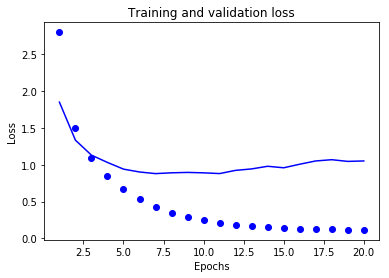

In [11]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [12]:
from keras.utils import plot_model
import os

plot_model(model, to_file='model.png')
# plot model definition
# if this fails execute:
# pip install pydot-ng
# sudo apt-get install graphviz
#model_plot_src = os.path.join(config['base-folder'], 'classification', 'model_lstm_' + task + '.png')
#plot_model(model, to_file=model_plot_src, show_shapes=True)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.